In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split

data = pd.read_csv("titanic.csv",
                   usecols=["cabin", "sex", "embarked", "survived"])

data.head()

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22,S
2,0,female,C22,S
3,0,male,C22,S
4,0,female,C22,S


In [2]:
data.dropna(subset=["embarked"], inplace=True)

In [3]:
data["cabin"] = data["cabin"].astype(str).str[0]

In [4]:
data = data[data["cabin"] != "T"]
data.shape

(1306, 4)

In [5]:
for col in data.columns:
    print(col, ": ", len(data[col].unique()), "labels")

survived :  2 labels
sex :  2 labels
cabin :  8 labels
embarked :  3 labels


In [6]:
data["cabin"].unique()

array(['B', 'C', 'E', 'D', 'A', 'n', 'F', 'G'], dtype=object)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data[["cabin", "sex", "embarked", "survived"]],
    data["survived"],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((914, 4), (392, 4))

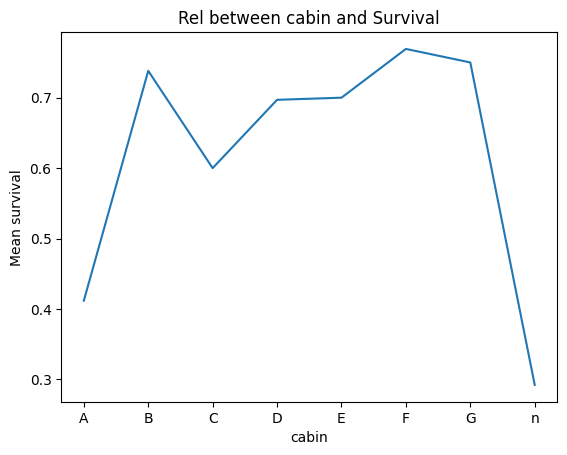

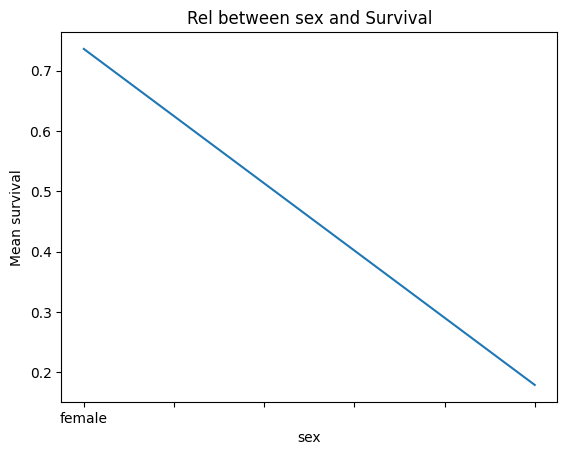

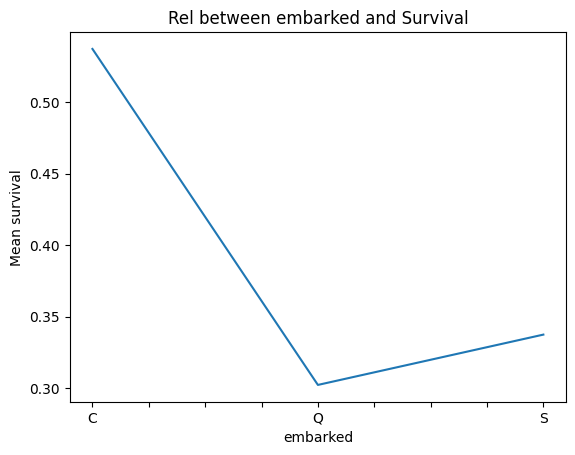

In [9]:
for var in ["cabin", "sex", "embarked"]:
    fig = pt.figure()
    fig = X_train.groupby([var])["survived"].mean().plot()
    fig.set_title("Rel between {} and Survival".format(var))
    fig.set_ylabel("Mean survival")
    pt.show()

In [10]:
total_survived = X_train["survived"].sum()

survived = X_train.groupby(["cabin"])["survived"].sum() / total_survived

survived

cabin
A    0.020408
B    0.090379
C    0.122449
D    0.067055
E    0.061224
F    0.029155
G    0.008746
n    0.600583
Name: survived, dtype: float64

In [11]:
total_non_survived = len(X_train) - X_train["survived"].sum()

X_train["non_survived"] = np.where(X_train["survived"] == 1, 0, 1)

non_survived = X_train.groupby(["cabin"])["non_survived"].sum() / total_non_survived
non_survived

cabin
A    0.017513
B    0.019264
C    0.049037
D    0.017513
E    0.015762
F    0.005254
G    0.001751
n    0.873905
Name: non_survived, dtype: float64

In [12]:
prob_df = pd.concat([survived, non_survived], axis=1)
prob_df["woe"] = np.log(prob_df["survived"] / prob_df["non_survived"])
prob_df

,survived,non_survived,woe
cabin,,,
A,0.020408,0.017513,0.152984
B,0.090379,0.019264,1.545751
C,0.122449,0.049037,0.915124
D,0.067055,0.017513,1.342568
E,0.061224,0.015762,1.356957
F,0.029155,0.005254,1.713632
G,0.008746,0.001751,1.608271
n,0.600583,0.873905,-0.375071


In [13]:
ordered_labels = prob_df["woe"].to_dict()
ordered_labels

{'A': 0.1529838185513379,
 'B': 1.545750694176846,
 'C': 0.9151238705982346,
 'D': 1.3425678854251744,
 'E': 1.356956622877274,
 'F': 1.7136315668160063,
 'G': 1.60827105115818,
 'n': -0.37507116447186734}

In [14]:
X_train["cabin"] = X_train["cabin"].map(ordered_labels)
X_test["cabin"] = X_test["cabin"].map(ordered_labels)

In [15]:
X_train["cabin"].head(10)

843    -0.375071
869    -0.375071
430    -0.375071
481    -0.375071
1308   -0.375071
456    -0.375071
118     1.342568
485     1.342568
297    -0.375071
263     1.356957
Name: cabin, dtype: float64

In [20]:
def find_category_mappings(df, var, target):
    tmp = df.copy()
    total_pos = df[target].sum()
    total_neg = len(df) - df[target].sum()
    tmp["non-target"] = 1 - tmp[target]
    pos_perc = tmp.groupby([var])[target].sum() / total_pos
    neg_perc = tmp.groupby([var])["non-target"].sum() / total_neg
    prob_tmp = pd.concat([pos_perc, neg_perc], axis=1)
    prob_tmp["woe"] = np.log(prob_tmp[target] / prob_tmp["non-target"])
    return prob_tmp["woe"].to_dict()

def integer_encode(train, test, var, ordinal_mapping):
    X_train[var] = X_train[var].map(ordinal_mapping)
    X_test[var] = X_test[var].map(ordinal_mapping)

In [21]:
for var in ["sex", "embarked"]:
     mappings = find_category_mappings(X_train, var, "survived")
     integer_encode(X_train, X_test, var, mappings)

X_train.head()

,cabin,sex,embarked,survived,non_survived
843,-0.375071,-1.013111,-0.164796,0,1
869,-0.375071,-1.013111,-0.164796,0,1
430,-0.375071,1.535068,-0.164796,1,0
481,-0.375071,1.535068,0.658871,1,0
1308,-0.375071,-1.013111,-0.164796,0,1


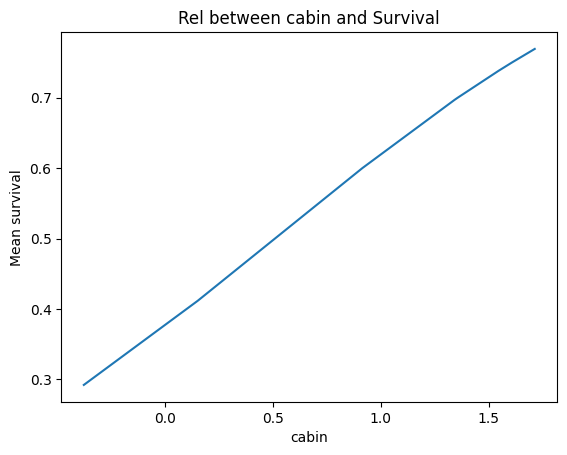

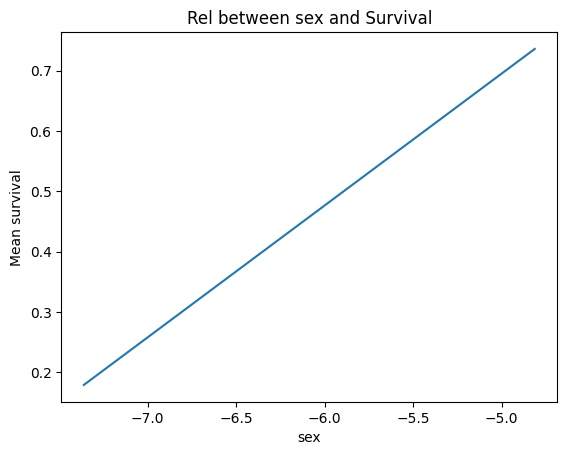

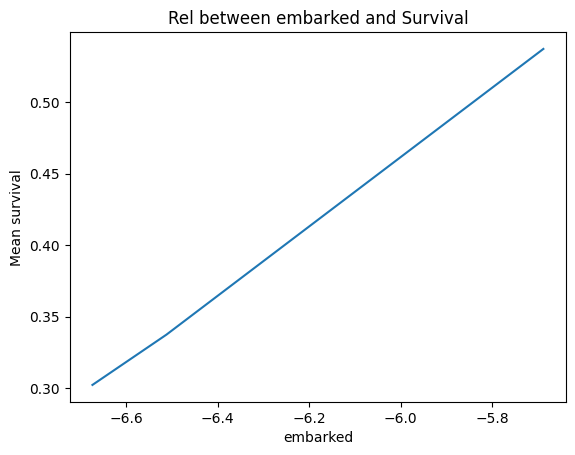

In [18]:
for var in ["cabin", "sex", "embarked"]:
    fig = pt.figure()
    fig = X_train.groupby([var])["survived"].mean().plot()
    fig.set_title("Rel between {} and Survival".format(var))
    fig.set_ylabel("Mean survival")
    pt.show()

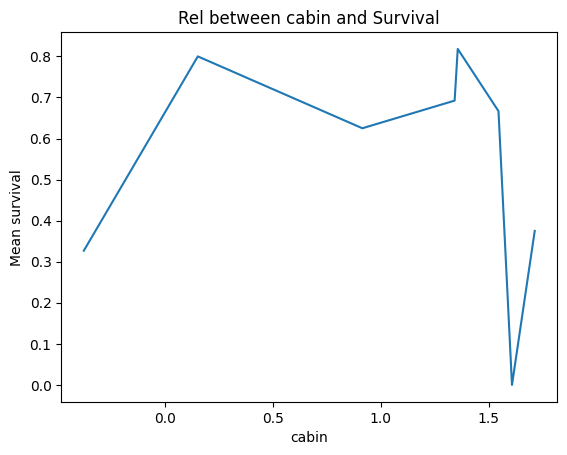

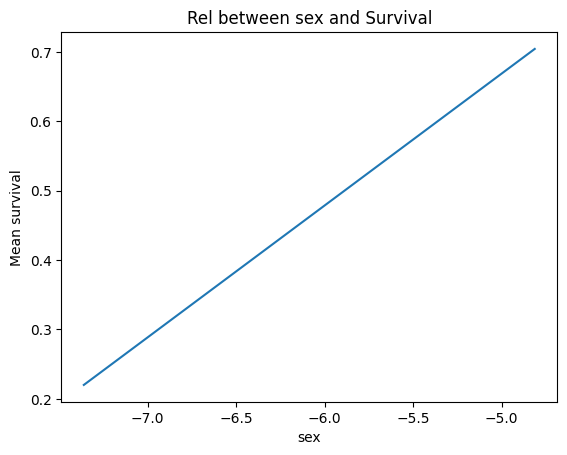

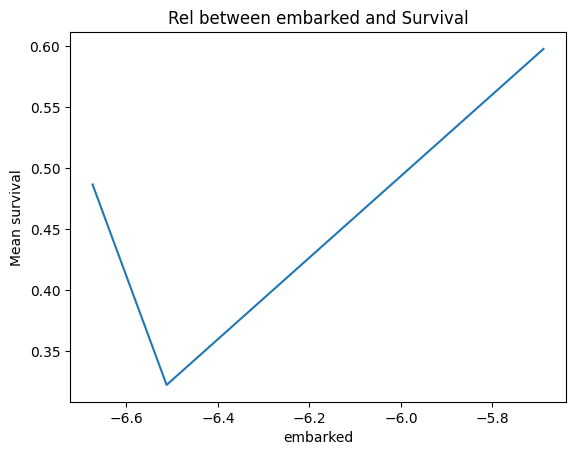

In [19]:
for var in ["cabin", "sex", "embarked"]:
    fig = pt.figure()
    fig = X_test.groupby([var])["survived"].mean().plot()
    fig.set_title("Rel between {} and Survival".format(var))
    fig.set_ylabel("Mean survival")
    pt.show()